# Portfolio Project 2

## Adv EDA + Regression

### Data PreProcessing & Model Building

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
app_df = pd.read_csv('CleanedAppsData.csv')
reviews_df = pd.read_csv('CleanedReviewsData.csv')

In [44]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000,19.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5000000,8.7,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,50000000,25.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,100000,2.8,2018


In [45]:
# prompt: Using dataframe app_df: show genres in each category

app_df.groupby('Category').agg({'Genres': lambda x: ','.join(set(x))})


,Genres
Category,
ART_AND_DESIGN,"Art & Design;Creativity,Art & Design,Art & Des..."
AUTO_AND_VEHICLES,Auto & Vehicles
BEAUTY,Beauty
BOOKS_AND_REFERENCE,Books & Reference
BUSINESS,Business
COMICS,"Comics;Creativity,Comics"
COMMUNICATION,Communication
DATING,Dating
EDUCATION,"Education;Brain Games,Education,Education;Educ..."


In [46]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [47]:
merged_df = pd.merge(app_df, reviews_df, on='App', how='left')
merged_df.head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB,Last Updated Year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000,19.0,2018,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,It bad >:(,Negative,-0.725000,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,I hate,Negative,-0.800000,0.900000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,omgggggg,Neutral,0.000000,0.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,It cute.,Positive,0.500000,1.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,I love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,2018,Love,Positive,0.500000,0.600000


In [48]:
merged_df.shape

(49693, 20)

In [49]:
# prompt: Using dataframe merged_df: how many null values are there, write them in percentage

merged_df.isnull().sum() / merged_df.shape[0] * 100


App                        0.000000
Category                   0.000000
Rating                     3.022559
Reviews                    0.000000
Size                       0.000000
Installs                   0.000000
Type                       0.000000
Price                      0.000000
Content Rating             0.000000
Genres                     0.000000
Last Updated               0.000000
Current Ver                0.016099
Android Ver                0.004025
Installs1                  0.000000
Size_MB                   30.310104
Last Updated Year          0.000000
Translated_Review         18.672650
Sentiment                 18.672650
Sentiment_Polarity        18.672650
Sentiment_Subjectivity    18.672650
dtype: float64

In [ ]:
# prompt: save this merged_df in to a csv file

merged_df.to_csv('MergedData.csv', index=False)


In [50]:
# prompt: Using dataframe merged_df: write a code to drop where Translated_Review is null

merged_df = merged_df.dropna(subset=['Translated_Review'])


In [51]:
merged_df.shape

(40414, 20)

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40414 entries, 1 to 49573
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40414 non-null  object 
 1   Category                40414 non-null  object 
 2   Rating                  40376 non-null  float64
 3   Reviews                 40414 non-null  int64  
 4   Size                    40414 non-null  object 
 5   Installs                40414 non-null  object 
 6   Type                    40414 non-null  object 
 7   Price                   40414 non-null  float64
 8   Content Rating          40414 non-null  object 
 9   Genres                  40414 non-null  object 
 10  Last Updated            40414 non-null  object 
 11  Current Ver             40414 non-null  object 
 12  Android Ver             40414 non-null  object 
 13  Installs1               40414 non-null  int64  
 14  Size_MB                 26523 non-null

In [53]:
merged_df.isnull().sum() / merged_df.shape[0] * 100

App                        0.000000
Category                   0.000000
Rating                     0.094027
Reviews                    0.000000
Size                       0.000000
Installs                   0.000000
Type                       0.000000
Price                      0.000000
Content Rating             0.000000
Genres                     0.000000
Last Updated               0.000000
Current Ver                0.000000
Android Ver                0.000000
Installs1                  0.000000
Size_MB                   34.371752
Last Updated Year          0.000000
Translated_Review          0.000000
Sentiment                  0.000000
Sentiment_Polarity         0.000000
Sentiment_Subjectivity     0.000000
dtype: float64

In [54]:
merged_df['Rating'].fillna(merged_df.groupby('Category')['Rating'].transform('mean'), inplace=True)

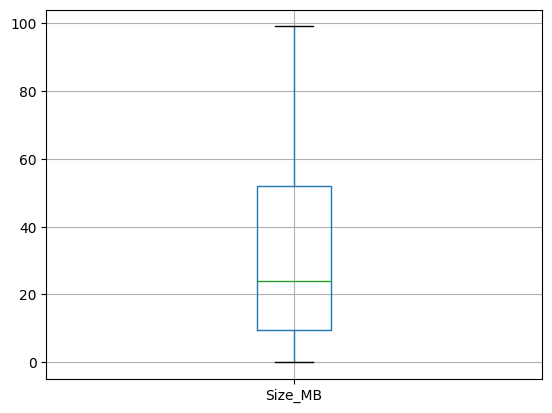

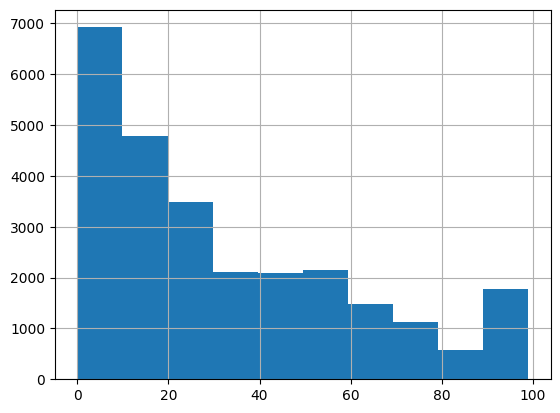

In [55]:
# prompt: make box plot and distribution chart for Size_MB



merged_df.boxplot(column='Size_MB')
plt.show()

merged_df['Size_MB'].hist()
plt.show()


In [56]:
# prompt: impute the missing values in Size_MB column with appropriate values

merged_df['Size_MB'].fillna(merged_df['Size_MB'].median(), inplace=True)


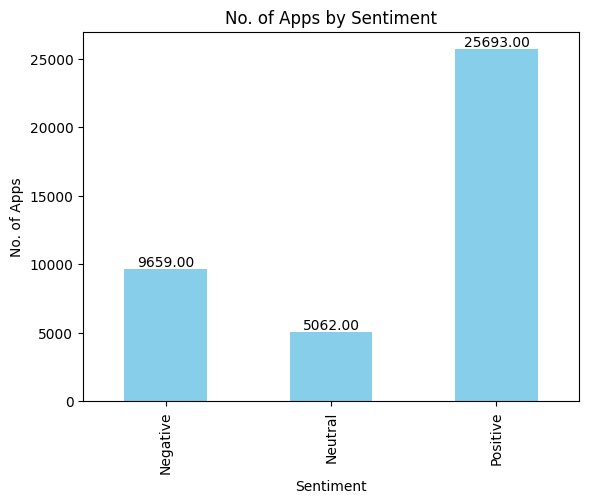

In [13]:
sentiment_means = merged_df.groupby('Sentiment')['App'].count()

# Plotting bar chart with values on each bar
ax = sentiment_means.plot(kind='bar', color='skyblue')
ax.set_title('No. of Apps by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('No. of Apps')

# Display values on each bar
for i, v in enumerate(sentiment_means):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')


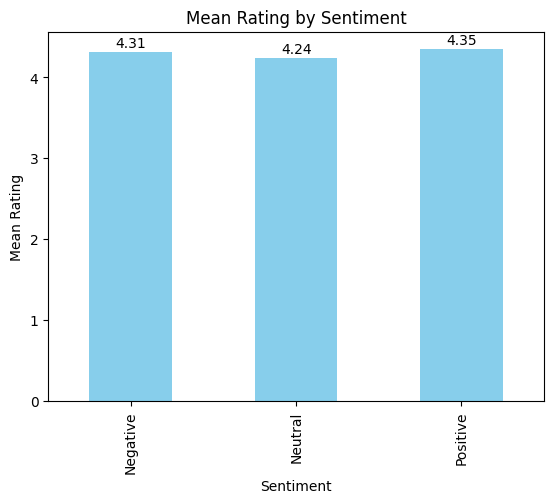

In [57]:
sentiment_means = merged_df.groupby('Sentiment')['Rating'].mean()

# Plotting bar chart with values on each bar
ax = sentiment_means.plot(kind='bar', color='skyblue')
ax.set_title('Mean Rating by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Mean Rating')

# Display values on each bar
for i, v in enumerate(sentiment_means):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')



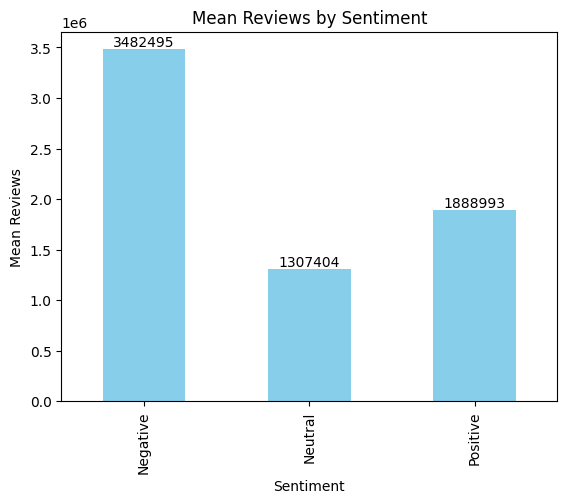

In [16]:
sentiment_means = merged_df.groupby('Sentiment')['Reviews'].mean()

# Plotting bar chart with values on each bar
ax = sentiment_means.plot(kind='bar', color='skyblue')
ax.set_title('Mean Reviews by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Mean Reviews')

# Display values on each bar
for i, v in enumerate(sentiment_means):
    ax.text(i, v , f'{v:.0f}', ha='center', va='bottom')


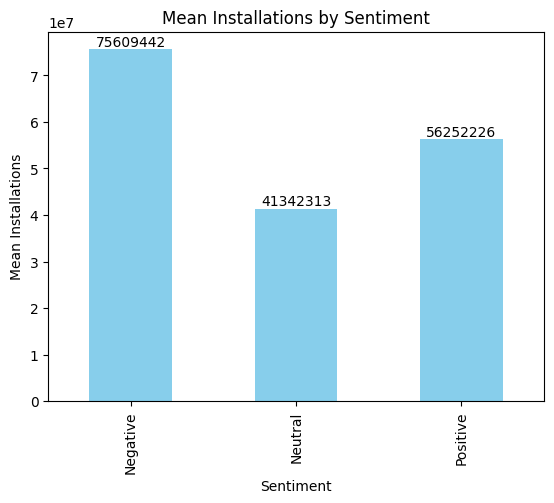

In [17]:
sentiment_means = merged_df.groupby('Sentiment')['Installs1'].mean()

# Plotting bar chart with values on each bar
ax = sentiment_means.plot(kind='bar', color='skyblue')
ax.set_title('Mean Installations by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Mean Installations')

# Display values on each bar
for i, v in enumerate(sentiment_means):
    ax.text(i, v , f'{v:.0f}', ha='center', va='bottom')

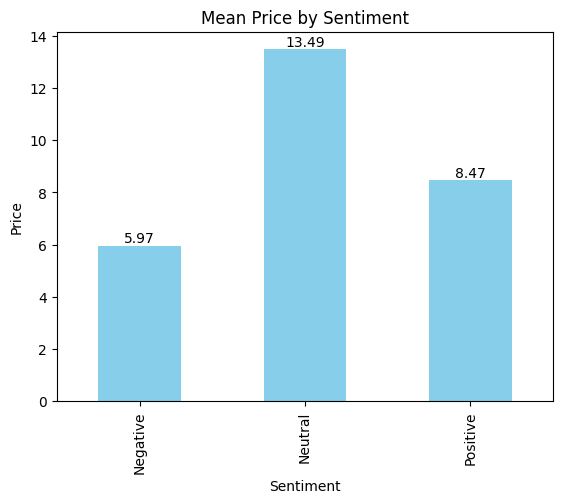

In [18]:
sentiment_means = merged_df[merged_df['Type']=='Paid'].groupby('Sentiment')['Price'].mean()

# Plotting bar chart with values on each bar
ax = sentiment_means.plot(kind='bar', color='skyblue')
ax.set_title('Mean Price by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Price')

# Display values on each bar
for i, v in enumerate(sentiment_means):
    ax.text(i, v , f'{v:.2f}', ha='center', va='bottom')

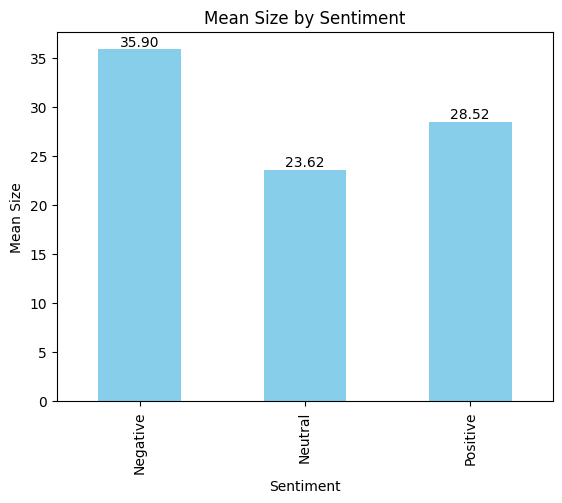

In [19]:
sentiment_means = merged_df.groupby('Sentiment')['Size_MB'].mean()

# Plotting bar chart with values on each bar
ax = sentiment_means.plot(kind='bar', color='skyblue')
ax.set_title('Mean Size by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Mean Size')

# Display values on each bar
for i, v in enumerate(sentiment_means):
    ax.text(i, v , f'{v:.2f}', ha='center', va='bottom')

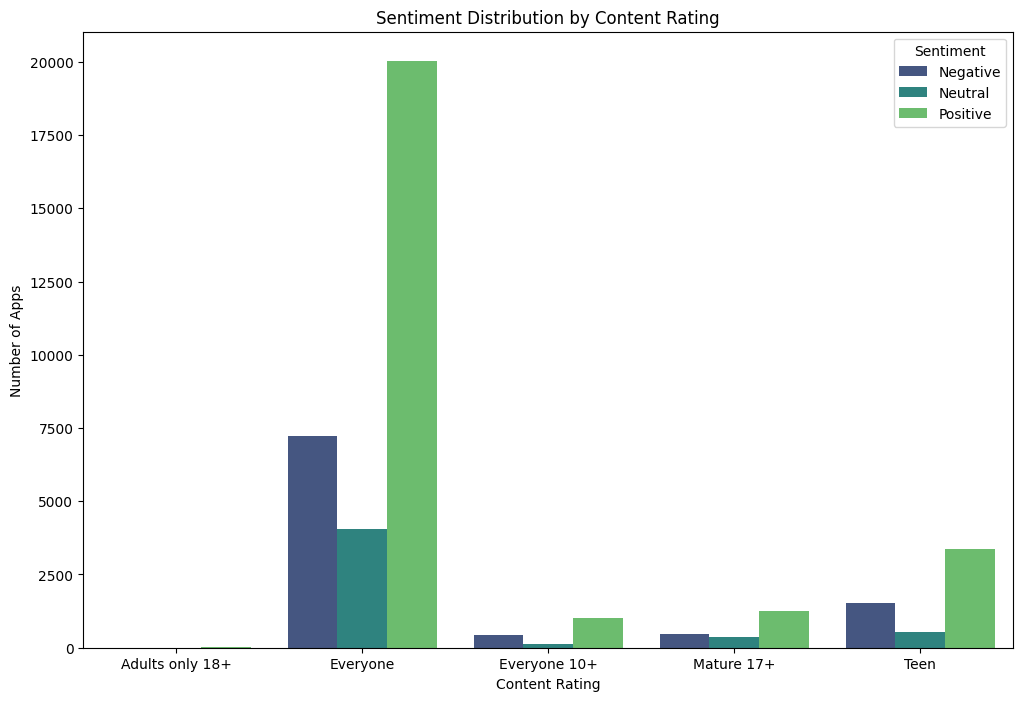

In [21]:
# Assuming your DataFrame is named sentiment_counts
sentiment_counts = merged_df.groupby(['Content Rating', 'Sentiment'])['App'].count().reset_index()

# Plotting grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Content Rating', y='App', hue='Sentiment', data=sentiment_counts, palette='viridis')
plt.title('Sentiment Distribution by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()


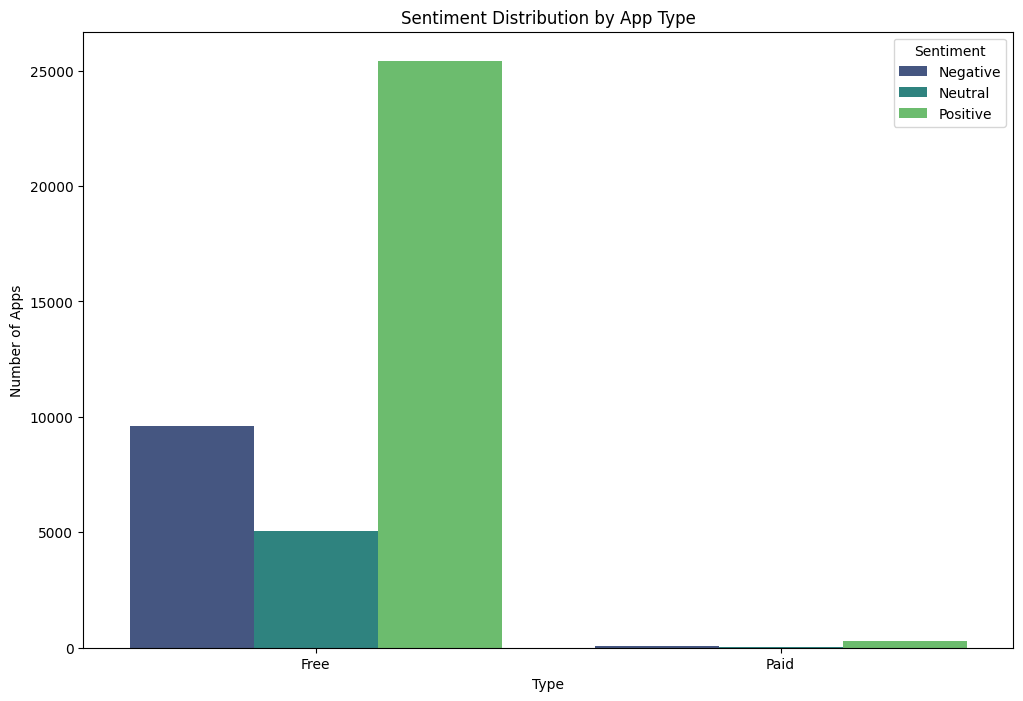

In [22]:
# Assuming your DataFrame is named sentiment_counts
sentiment_counts = merged_df.groupby(['Type', 'Sentiment'])['App'].count().reset_index()

# Plotting grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Type', y='App', hue='Sentiment', data=sentiment_counts, palette='viridis')
plt.title('Sentiment Distribution by App Type')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.show()


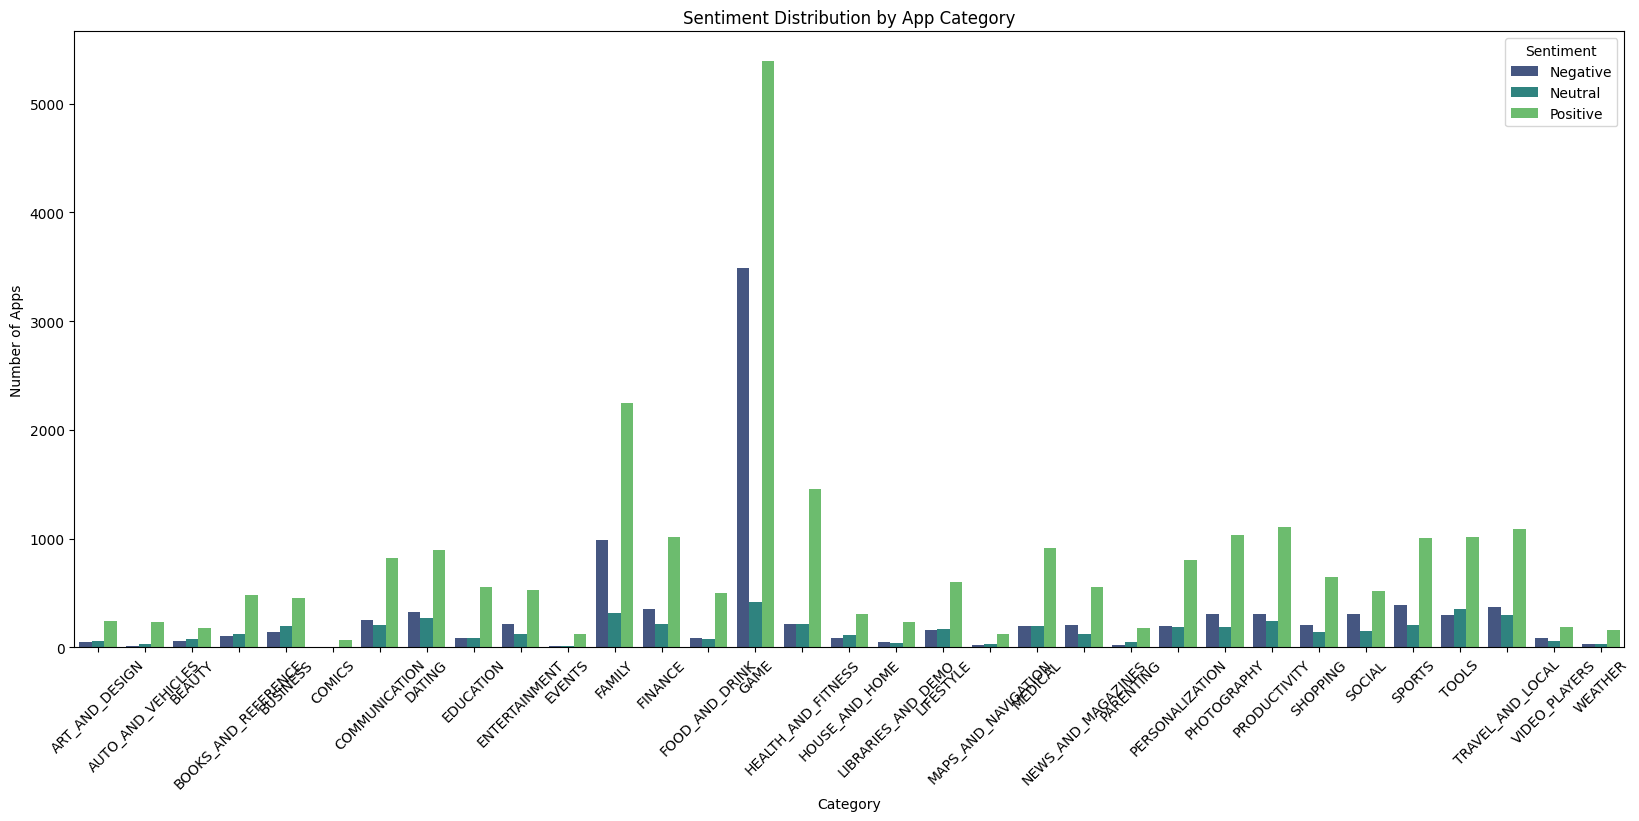

In [23]:
# Assuming your DataFrame is named sentiment_counts
sentiment_counts = merged_df.groupby(['Category', 'Sentiment'])['App'].count().reset_index()

# Plotting grouped bar chart
plt.figure(figsize=(20, 8))
sns.barplot(x='Category', y='App', hue='Sentiment', data=sentiment_counts, palette='viridis')
plt.title('Sentiment Distribution by App Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-b514515c4052>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


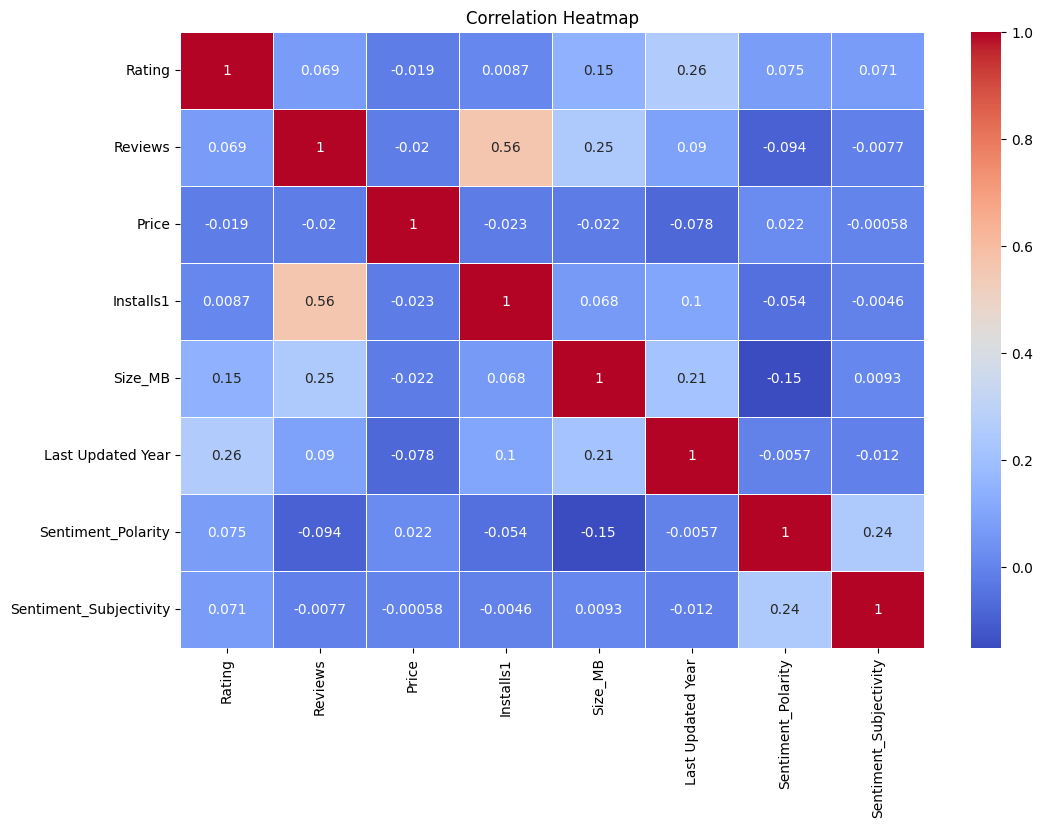

In [58]:
plt.figure(figsize=(12, 8))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [59]:
# prompt: handle categorical data in merged_df using one_hot encoding and label_encoding wherever needed

# One-hot encoding for categorical variables
merged_df = pd.get_dummies(merged_df, columns=['Category', 'Content Rating', 'Type'])

# Label encoding for categorical variables
merged_df['Sentiment'] = LabelEncoder().fit_transform(merged_df['Sentiment'])


In [60]:
merged_df = merged_df.drop(['Size', 'Installs'], axis=1)

In [61]:
merged_df.head()

,App,Rating,Reviews,Price,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB,...,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Free,Type_Paid
1,Coloring book moana,3.9,967,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,...,0,0,0,0,1,0,0,0,1,0
2,Coloring book moana,3.9,967,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,...,0,0,0,0,1,0,0,0,1,0
3,Coloring book moana,3.9,967,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,...,0,0,0,0,1,0,0,0,1,0
4,Coloring book moana,3.9,967,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,...,0,0,0,0,1,0,0,0,1,0
5,Coloring book moana,3.9,967,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14.0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
merged_df.columns

Index(['App', 'Rating', 'Reviews', 'Price', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Installs1', 'Size_MB',
       'Last Updated Year', 'Translated_Review', 'Sentiment',
       'Sentiment_Polarity', 'Sentiment_Subjectivity',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',

In [63]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40414 entries, 1 to 49573
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             40414 non-null  object 
 1   Rating                          40414 non-null  float64
 2   Reviews                         40414 non-null  int64  
 3   Price                           40414 non-null  float64
 4   Genres                          40414 non-null  object 
 5   Last Updated                    40414 non-null  object 
 6   Current Ver                     40414 non-null  object 
 7   Android Ver                     40414 non-null  object 
 8   Installs1                       40414 non-null  int64  
 9   Size_MB                         40414 non-null  float64
 10  Last Updated Year               40414 non-null  int64  
 11  Translated_Review               40414 non-null  object 
 12  Sentiment                       

In [34]:
merged_df['Genres'].value_counts()

Action                               3158
Sports                               2192
Health & Fitness                     1888
Travel & Local                       1747
Casual                               1707
                                     ... 
Role Playing;Pretend Play              33
Casual;Action & Adventure              22
Travel & Local;Action & Adventure      18
Simulation;Pretend Play                14
Educational;Brain Games                 3
Name: Genres, Length: 68, dtype: int64

In [64]:

# Features (X) and target variable (y)
X = merged_df.drop(['Rating','App','Translated_Review' , 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver' ], axis=1)
y = merged_df['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [65]:
print(X.dtypes)

Reviews                             int64
Price                             float64
Installs1                           int64
Size_MB                           float64
Last Updated Year                   int64
Sentiment                           int64
Sentiment_Polarity                float64
Sentiment_Subjectivity            float64
Category_ART_AND_DESIGN             uint8
Category_AUTO_AND_VEHICLES          uint8
Category_BEAUTY                     uint8
Category_BOOKS_AND_REFERENCE        uint8
Category_BUSINESS                   uint8
Category_COMICS                     uint8
Category_COMMUNICATION              uint8
Category_DATING                     uint8
Category_EDUCATION                  uint8
Category_ENTERTAINMENT              uint8
Category_EVENTS                     uint8
Category_FAMILY                     uint8
Category_FINANCE                    uint8
Category_FOOD_AND_DRINK             uint8
Category_GAME                       uint8
Category_HEALTH_AND_FITNESS       

In [66]:
# Initialize the linear regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0664948565825588


In [68]:


mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.18829770507466217


In [70]:
residuals = y_test - y_pred
residuals

32321   -0.299265
11768    0.434200
14302    0.026437
21690    0.053606
39568    0.051201
           ...   
12118    0.346342
16830   -0.033300
14036    0.130138
14043    0.142731
23950   -0.490402
Name: Rating, Length: 10104, dtype: float64

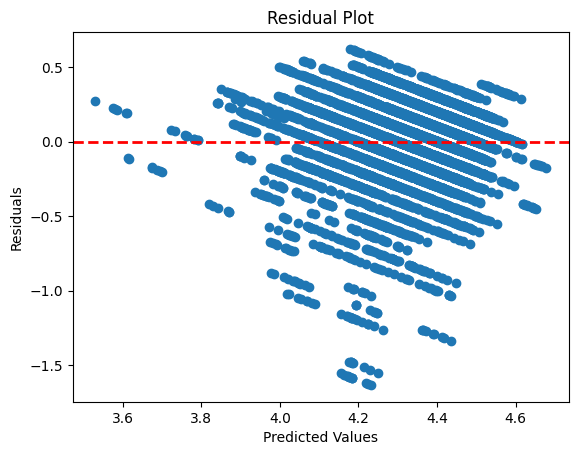

In [73]:
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.show()

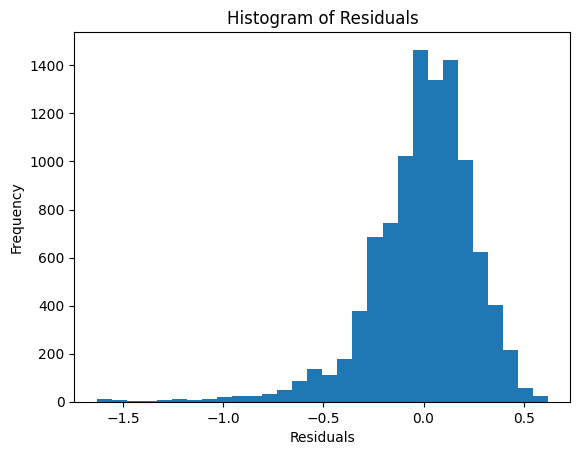

In [74]:
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


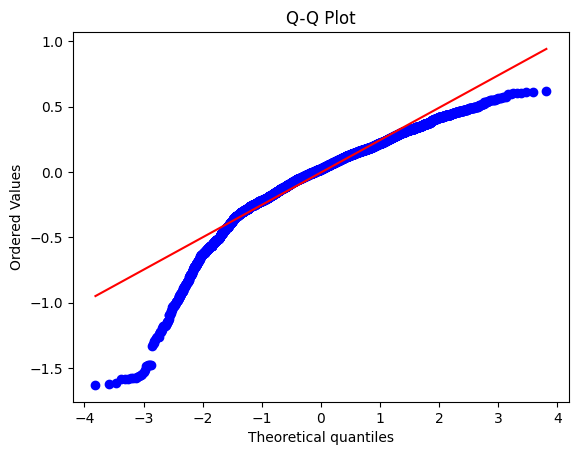

In [75]:
from scipy.stats import probplot

probplot(residuals, plot=plt)
plt.title('Q-Q Plot')
plt.show()
